In [78]:
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path
import json
import os
import seaborn as sns
FILE_PATH_DICT = "case_id_and_structure.json"
with open(FILE_PATH_DICT, 'r') as file:
    file_parsed = json.load(file)

copy_number_folder_list = []
for key in file_parsed.keys():
    copy_number_folder_list.append(file_parsed[key]["files"]["copy_number"])

        

In [69]:
PATH_COPY_NUMBER = "/Users/davidelupo/Desktop/AI_Bioinformatics_GitHub/AI_for_Bioinformatics_Project/Copy_Number"
number_of_rows = []
list_df_CNA = []
for root, dirs, files in os.walk(PATH_COPY_NUMBER):
    for dir in dirs:
        for root, dirs, files in os.walk(PATH_COPY_NUMBER + "/" + dir):
            for file in files:
                if file in copy_number_folder_list:
                    list_df_CNA.append(pd.read_csv(PATH_COPY_NUMBER + "/" + dir + "/" + file, sep='\t'))
                    with open(PATH_COPY_NUMBER + "/" + dir + "/" + file, 'r') as fp:
                        lines = len(fp.readlines())
                        number_of_rows.append(int(lines))

copy_number = pd.Series(number_of_rows)


In [74]:
if(len(set(number_of_rows)) == 1):
    print('tutti i file hanno lo stesso numero di righe: ',number_of_rows[0])

print('numero di file Copy Number letti:', len(list_df_CNA))

tutti i file hanno lo stesso numero di righe:  60624
numero di file Copy Number letti: 226


{5637, 5152, 5670, 6195, 5685, 5186, 5196, 5709, 5199, 5714, 5722, 5228, 5743, 5235, 5246, 5259, 5264, 5776, 5784, 5274, 5281, 5796, 5809, 5810, 6324, 5304, 5305, 5314, 5830, 5319, 5841, 5337, 5343, 5370, 5884, 5899, 5396, 5407, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 821, 5432, 824, 4944, 348, 349, 351, 352, 353, 5472, 354, 356, 357, 358, 5991, 360, 359, 362, 363, 365, 366, 367, 368, 4976, 371, 374, 375, 4989, 6014, 5505, 389, 390, 392, 393, 6027, 6028, 395, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 411, 415, 416, 420, 5547, 427, 5550, 6066, 5556, 442, 5050, 5565, 5053, 6083, 5063, 5579, 5580, 5592, 5596, 6115, 5091, 5605, 5093, 6119, 5097, 6130, 5621}


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


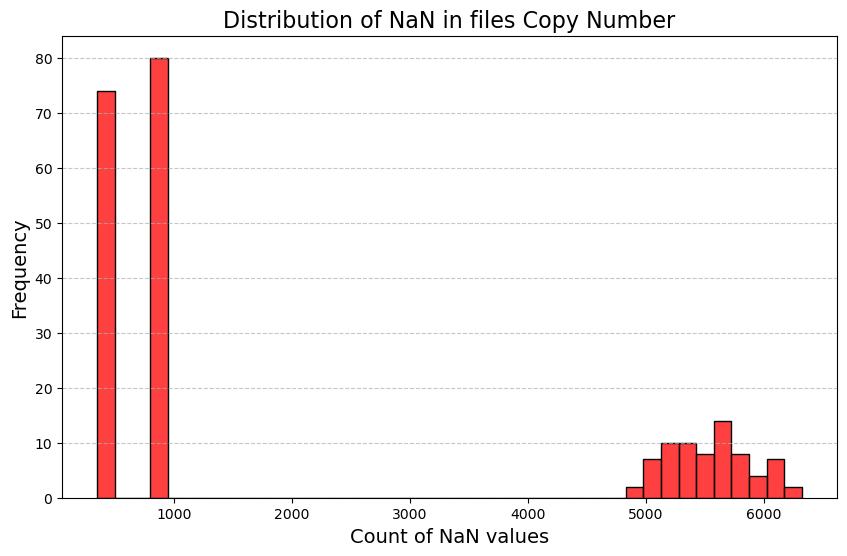

In [83]:
list_NaN = []
for i in range(len(list_df_CNA)):
    list_NaN.append(list_df_CNA[i]['copy_number'].isnull().sum())
print(set(list_NaN))
#pd.Series(list_NaN).hist()
plt.figure(figsize=(10, 6))
sns.histplot(list_NaN, bins=40, kde=False, color="red")
plt.title("Distribution of NaN in files Copy Number", fontsize=16)
plt.xlabel("Count of NaN values", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [91]:
list_df_CNA[80].head()

,gene_id,gene_name,chromosome,start,end,copy_number,min_copy_number,max_copy_number
0,ENSG00000223972.5,DDX11L1,chr1,11869,14409,NaN,NaN,NaN
1,ENSG00000227232.5,WASH7P,chr1,14404,29570,NaN,NaN,NaN
2,ENSG00000278267.1,MIR6859-1,chr1,17369,17436,NaN,NaN,NaN
3,ENSG00000243485.5,MIR1302-2HG,chr1,29554,31109,NaN,NaN,NaN
4,ENSG00000284332.1,MIR1302-2,chr1,30366,30503,NaN,NaN,NaN


Because there are two parental strands, the resulting Copy Number Segment or Allele-Specific Copy Number Segment files contain 3 different copy number integer values: Major_Copy_Number refers to the larger strand copy number, Minor_Copy_Number refers to the smaller strand copy number, Copy_Number is the sum of Major_Copy_Number and Minor_Copy_Number, and thus equals to the total copy number at the locus. source: [GDC documentation](https://docs.gdc.cancer.gov/Data/Bioinformatics_Pipelines/CNV_Pipeline/)

In some occasions, one gene may overlap with more than one segment. In this case, min_copy_number is the minimum value of all segments it overlaps, max_copy_number is the maximum value of all segments it overlaps, and copy_number is calculated as the weighted (on length of overlapped regions) median of copy number values from all overlapped segments. When there is a tie (very rare), the smaller number is used. If a gene overlaps with only one segment, copy_number = min_copy_number = max_copy_number. If a gene overlaps with no segments, the gene gets empty value "" in copy_number, min_copy_number and max_copy_number. [GDC documentation](https://docs.gdc.cancer.gov/Data/Bioinformatics_Pipelines/CNV_Pipeline/)

In [ ]:
df_filled = []
for i in range(len(list_df_CNA)):
    df_filled.append(list_df_CNA[i].fillna(0))

In [97]:
df_filled[0][:20]

,gene_id,gene_name,chromosome,start,end,copy_number,min_copy_number,max_copy_number
0,ENSG00000223972.5,DDX11L1,chr1,11869,14409,0.0,0.0,0.0
1,ENSG00000227232.5,WASH7P,chr1,14404,29570,0.0,0.0,0.0
2,ENSG00000278267.1,MIR6859-1,chr1,17369,17436,0.0,0.0,0.0
3,ENSG00000243485.5,MIR1302-2HG,chr1,29554,31109,0.0,0.0,0.0
4,ENSG00000284332.1,MIR1302-2,chr1,30366,30503,0.0,0.0,0.0
5,ENSG00000237613.2,FAM138A,chr1,34554,36081,0.0,0.0,0.0
6,ENSG00000268020.3,OR4G4P,chr1,52473,53312,0.0,0.0,0.0
7,ENSG00000240361.2,OR4G11P,chr1,57598,64116,0.0,0.0,0.0
8,ENSG00000186092.6,OR4F5,chr1,65419,71585,0.0,0.0,0.0
9,ENSG00000238009.6,AL627309.1,chr1,89295,133723,0.0,0.0,0.0


In [67]:
print(df_filled[0].isna().sum())  # Verifica che non ci siano più valori NaN


gene_id            0
gene_name          0
chromosome         0
start              0
end                0
copy_number        0
min_copy_number    0
max_copy_number    0
dtype: int64


In [98]:
df_filled[0][:1000]['copy_number']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
995    3.0
996    3.0
997    3.0
998    3.0
999    3.0
Name: copy_number, Length: 1000, dtype: float64

Numero di nodi: 100
Numero di archi: 67


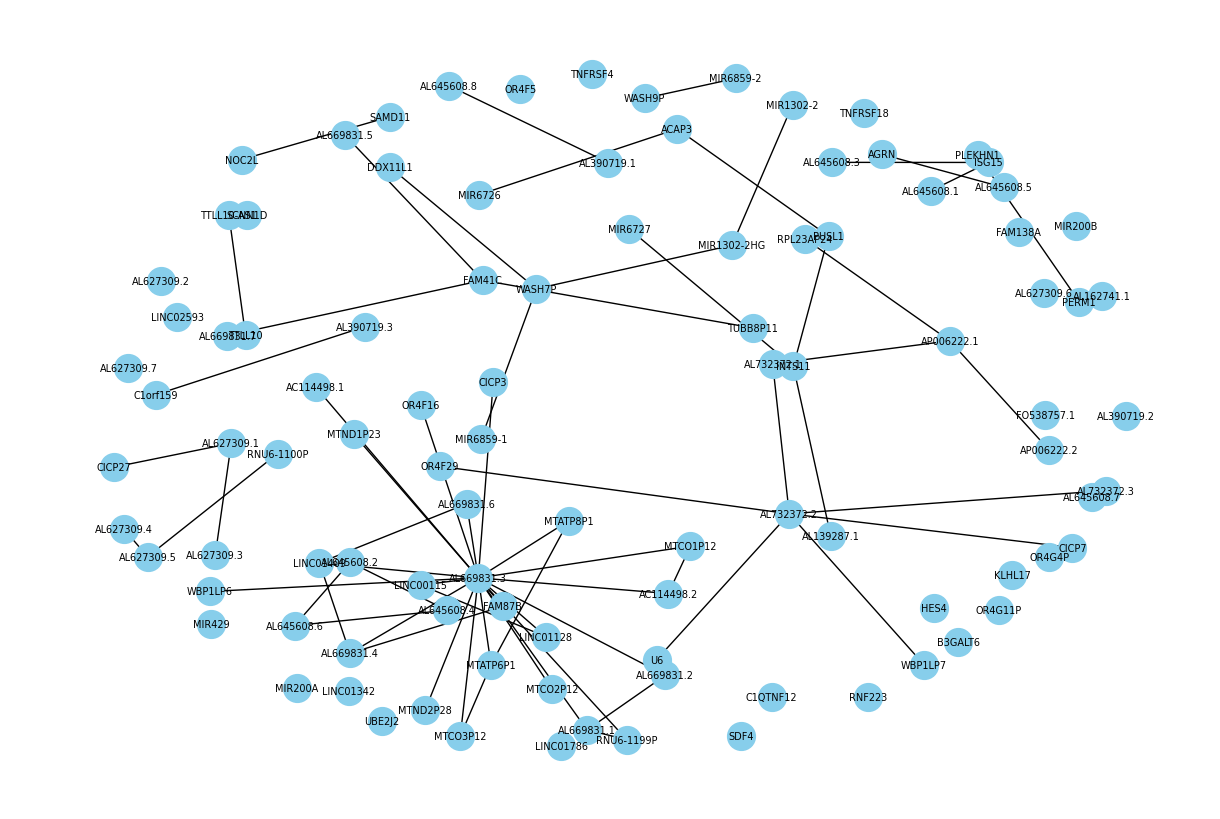

In [126]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

#per fare testing considero per ora solo un subset dei 60.000 geni totali relativi a un paziente specifico
df_CNA_small = df_filled[0][:100]
# Crea un grafo vuoto
G = nx.Graph()

# Aggiungi i geni come nodi
for _, row in df_CNA_small.iterrows():
    G.add_node(row['gene_name'], start=row['start'], end=row['end'], chromosome=row['chromosome'])

# Aggiungi archi basati sulla sovrapposizione delle coordinate (start, end)
for i, gene1 in df_CNA_small.iterrows():
    for j, gene2 in df_CNA_small.iterrows():
        if i >= j:
            continue  # Evita di considerare due volte la stessa coppia
        if gene1['chromosome'] == gene2['chromosome']:
            # Controlla la sovrapposizione dei segmenti
            if (gene1['start'] <= gene2['end']) and (gene1['end'] >= gene2['start']):
                G.add_edge(gene1['gene_name'], gene2['gene_name'])

# Mostra informazioni sul grafo
print("Numero di nodi:", G.number_of_nodes())
print("Numero di archi:", G.number_of_edges())

# Visualizza il grafo
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G,k=0.5)  # Layout del grafo
#pos = nx.shell_layout(G)
#pos = nx.planar_layout(G)
nx.draw(G, pos, with_labels=True, node_size=400, node_color="skyblue", font_size=7, font_color="black")
plt.show()


In [127]:
# Numero di nodi (geni) e archi (relazioni di sovrapposizione)
print("Numero di nodi:", G.number_of_nodes())
print("Numero di archi:", G.number_of_edges())

# Grado di ciascun nodo (numero di connessioni per gene)
degrees = dict(G.degree())
print("Gradi dei nodi:", degrees)

# Nodo con il massimo grado (gene con più connessioni)
max_degree_node = max(degrees, key=degrees.get)
print(f"Gene con il massimo grado: {max_degree_node} ({degrees[max_degree_node]} connessioni)")


Numero di nodi: 100
Numero di archi: 67
Gradi dei nodi: {'DDX11L1': 1, 'WASH7P': 3, 'MIR6859-1': 1, 'MIR1302-2HG': 2, 'MIR1302-2': 1, 'FAM138A': 0, 'OR4G4P': 0, 'OR4G11P': 0, 'OR4F5': 0, 'AL627309.1': 2, 'AL627309.3': 1, 'CICP27': 1, 'AL627309.6': 0, 'AL627309.7': 0, 'AL627309.2': 0, 'AL627309.5': 2, 'RNU6-1100P': 1, 'AL627309.4': 1, 'FO538757.1': 0, 'WASH9P': 1, 'MIR6859-2': 1, 'AP006222.1': 3, 'AP006222.2': 1, 'RPL23AP24': 1, 'AL732372.1': 2, 'AL732372.2': 6, 'WBP1LP7': 1, 'OR4F29': 1, 'CICP7': 1, 'AL732372.3': 1, 'U6': 1, 'AL669831.3': 21, 'AC114498.1': 1, 'MTND1P23': 1, 'MTND2P28': 1, 'MTCO1P12': 2, 'AC114498.2': 2, 'MTCO2P12': 1, 'MTATP8P1': 2, 'MTATP6P1': 3, 'MTCO3P12': 2, 'WBP1LP6': 1, 'OR4F16': 1, 'CICP3': 1, 'AL669831.1': 3, 'RNU6-1199P': 2, 'AL669831.2': 2, 'LINC01409': 3, 'AL669831.6': 2, 'AL669831.4': 3, 'FAM87B': 2, 'LINC01128': 2, 'LINC00115': 2, 'AL669831.7': 1, 'FAM41C': 3, 'TUBB8P11': 1, 'AL669831.5': 1, 'AL645608.6': 2, 'AL645608.2': 2, 'AL645608.4': 2, 'LINC02593': 0

In [128]:
# Trova tutte le componenti connesse
connected_components = list(nx.connected_components(G))
print("Numero di componenti connesse:", len(connected_components))

# Mostra le componenti
# for i, component in enumerate(connected_components):
#     print(f"Component {i + 1}: {component}")


Numero di componenti connesse: 43
Component 1: {'MIR1302-2HG', 'MIR6859-1', 'MIR1302-2', 'WASH7P', 'DDX11L1'}
Component 2: {'FAM138A'}
Component 3: {'OR4G4P'}
Component 4: {'OR4G11P'}
Component 5: {'OR4F5'}
Component 6: {'AL627309.1', 'CICP27', 'AL627309.3'}
Component 7: {'AL627309.6'}
Component 8: {'AL627309.7'}
Component 9: {'AL627309.2'}
Component 10: {'RNU6-1100P', 'AL627309.4', 'AL627309.5'}
Component 11: {'FO538757.1'}
Component 12: {'WASH9P', 'MIR6859-2'}
Component 13: {'AL732372.3', 'CICP7', 'OR4F29', 'AP006222.2', 'RPL23AP24', 'AL732372.2', 'U6', 'AL732372.1', 'AP006222.1', 'WBP1LP7'}
Component 14: {'MTCO1P12', 'MTCO3P12', 'WBP1LP6', 'LINC01409', 'MTCO2P12', 'AL669831.3', 'AL669831.6', 'AC114498.1', 'CICP3', 'RNU6-1199P', 'MTND2P28', 'AC114498.2', 'LINC00115', 'MTATP8P1', 'AL669831.1', 'AL669831.2', 'FAM87B', 'MTND1P23', 'OR4F16', 'AL669831.4', 'MTATP6P1', 'LINC01128'}
Component 15: {'FAM41C', 'AL669831.5', 'TUBB8P11', 'AL669831.7'}
Component 16: {'AL645608.4', 'AL645608.2', '

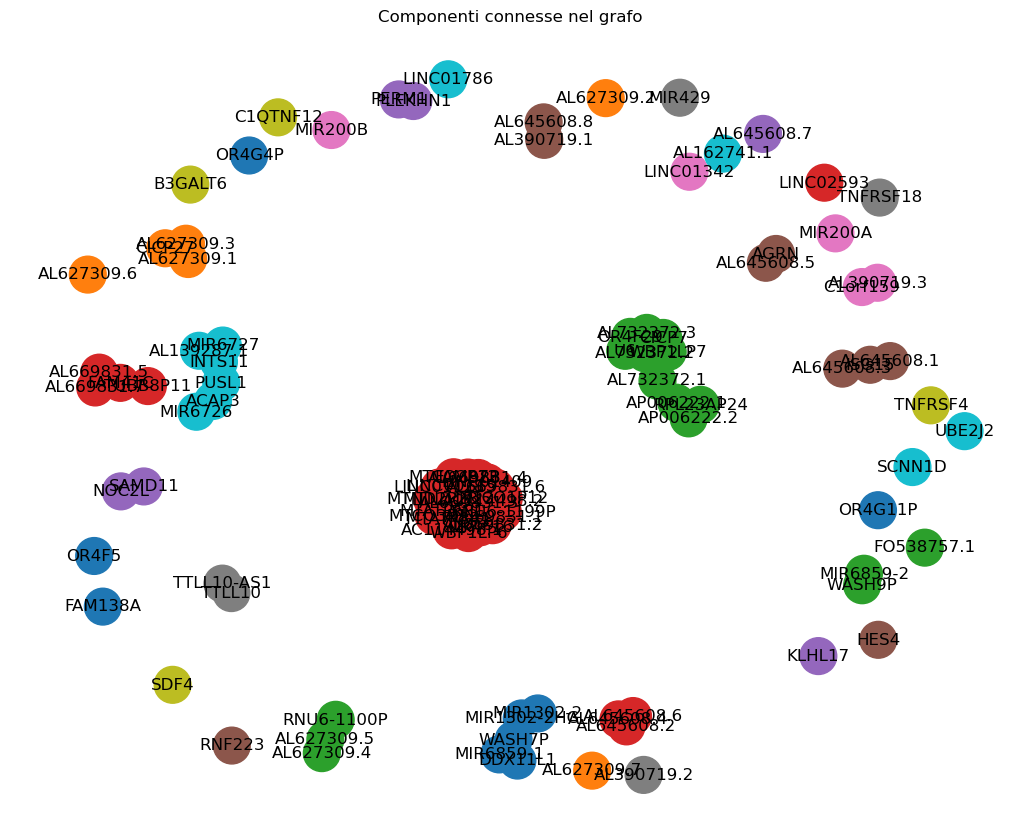

In [132]:
import matplotlib.pyplot as plt

# Assegna un colore a ogni componente connessa
color_map = {}
for i, component in enumerate(connected_components):
    for node in component:
        color_map[node] = i  # Assegna un ID colore per ogni componente

# Colori per i nodi
colors = [color_map[node] for node in G.nodes]

# Disegna il grafo con i colori delle componenti
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(
    G, pos, node_color=colors, with_labels=True, 
    node_size=700, cmap=plt.cm.tab10
)
plt.title("Componenti connesse nel grafo")
plt.show()


In [133]:
from networkx.algorithms.community import greedy_modularity_communities

# Trova comunità usando la modularità
communities = list(greedy_modularity_communities(G))
print("Numero di comunità trovate:", len(communities))

# Mostra le comunità
for i, community in enumerate(communities):
    print(f"Comunità {i + 1}: {sorted(community)}")


Numero di comunità trovate: 43
Comunità 1: ['AC114498.1', 'AC114498.2', 'AL669831.1', 'AL669831.2', 'AL669831.3', 'AL669831.4', 'AL669831.6', 'CICP3', 'FAM87B', 'LINC00115', 'LINC01128', 'LINC01409', 'MTATP6P1', 'MTATP8P1', 'MTCO1P12', 'MTCO2P12', 'MTCO3P12', 'MTND1P23', 'MTND2P28', 'OR4F16', 'RNU6-1199P', 'WBP1LP6']
Comunità 2: ['AL732372.1', 'AL732372.2', 'AL732372.3', 'AP006222.1', 'AP006222.2', 'CICP7', 'OR4F29', 'RPL23AP24', 'U6', 'WBP1LP7']
Comunità 3: ['ACAP3', 'AL139287.1', 'INTS11', 'MIR6726', 'MIR6727', 'PUSL1']
Comunità 4: ['DDX11L1', 'MIR1302-2', 'MIR1302-2HG', 'MIR6859-1', 'WASH7P']
Comunità 5: ['AL669831.5', 'AL669831.7', 'FAM41C', 'TUBB8P11']
Comunità 6: ['AL627309.1', 'AL627309.3', 'CICP27']
Comunità 7: ['AL627309.4', 'AL627309.5', 'RNU6-1100P']
Comunità 8: ['AL645608.2', 'AL645608.4', 'AL645608.6']
Comunità 9: ['AL645608.1', 'AL645608.3', 'ISG15']
Comunità 10: ['MIR6859-2', 'WASH9P']
Comunità 11: ['NOC2L', 'SAMD11']
Comunità 12: ['PERM1', 'PLEKHN1']
Comunità 13: ['AGRN

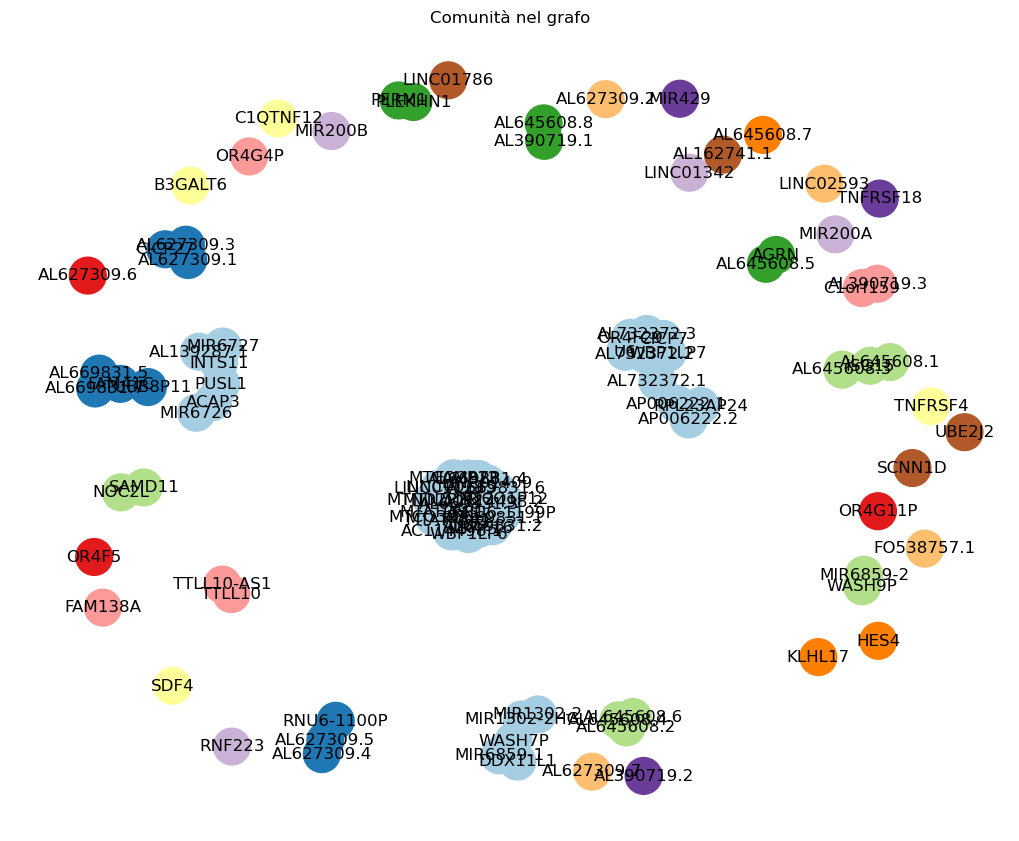

In [134]:
# Assegna un colore a ogni comunità
community_map = {}
for i, community in enumerate(communities):
    for node in community:
        community_map[node] = i

# Colori per i nodi
community_colors = [community_map[node] for node in G.nodes]

# Disegna il grafo con i colori delle comunità
plt.figure(figsize=(10, 8))
nx.draw(
    G, pos, node_color=community_colors, with_labels=True, 
    node_size=700, cmap=plt.cm.Paired
)
plt.title("Comunità nel grafo")
plt.show()


In [135]:
# Coefficiente di clustering globale
global_clustering = nx.average_clustering(G)
print("Coefficiente di clustering globale:", global_clustering)

# Coefficiente di clustering per ciascun nodo
clustering_per_node = nx.clustering(G)
print("Clustering per nodo:", clustering_per_node)

#Il coefficiente di clustering misura quanto un nodo è parte di una "triade",
# ovvero se i suoi vicini sono collegati tra loro.

Coefficiente di clustering globale: 0.1570952380952381
Clustering per nodo: {'DDX11L1': 0, 'WASH7P': 0, 'MIR6859-1': 0, 'MIR1302-2HG': 0, 'MIR1302-2': 0, 'FAM138A': 0, 'OR4G4P': 0, 'OR4G11P': 0, 'OR4F5': 0, 'AL627309.1': 0, 'AL627309.3': 0, 'CICP27': 0, 'AL627309.6': 0, 'AL627309.7': 0, 'AL627309.2': 0, 'AL627309.5': 0, 'RNU6-1100P': 0, 'AL627309.4': 0, 'FO538757.1': 0, 'WASH9P': 0, 'MIR6859-2': 0, 'AP006222.1': 0, 'AP006222.2': 0, 'RPL23AP24': 0, 'AL732372.1': 0, 'AL732372.2': 0, 'WBP1LP7': 0, 'OR4F29': 0, 'CICP7': 0, 'AL732372.3': 0, 'U6': 0, 'AL669831.3': 0.04285714285714286, 'AC114498.1': 0, 'MTND1P23': 0, 'MTND2P28': 0, 'MTCO1P12': 1.0, 'AC114498.2': 1.0, 'MTCO2P12': 0, 'MTATP8P1': 1.0, 'MTATP6P1': 0.6666666666666666, 'MTCO3P12': 1.0, 'WBP1LP6': 0, 'OR4F16': 0, 'CICP3': 0, 'AL669831.1': 0.6666666666666666, 'RNU6-1199P': 1.0, 'AL669831.2': 1.0, 'LINC01409': 0.6666666666666666, 'AL669831.6': 1.0, 'AL669831.4': 0.6666666666666666, 'FAM87B': 1.0, 'LINC01128': 1.0, 'LINC00115': 1.0, 'A